# Image processing
In this notebook, images downloaded with the bing image crawler are preprocessed to reduce the manual labeling effort. This is done by removing invalid images and dropping duplicates. 

In [1]:
import pandas as pd
from glob import glob
from PIL import Image
import os
import tqdm

In [2]:
path_images = './dataset/'

# check for invalid images

In [4]:
list_files = os.listdir(path_images)
list_files.remove('.ipynb_checkpoints')

2

In [5]:
#remove all imges that are not valid
for dir in list_files:
    for file in glob(path_images + dir + '/*'):
        try: 
            Image.open(file)
        except:
            print('file: ' + file + ' was not valid.')
            os.remove(file)

# check for duplicates 

In [6]:
# source: https://medium.com/@urvisoni/removing-duplicate-images-through-python-23c5fdc7479e
import hashlib
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np
import hashlib

In [7]:
os.chdir('/home/jpawick/Medienverarbeitung/dataset')

squash leaf
1443


/home/jpawick/.conda/envs/env_pattern_ex/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/jpawick/.conda/envs/env_pattern_ex/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


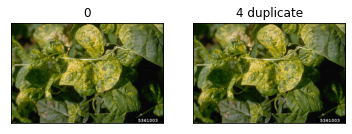

deleted 1443 images
soybean leaf blight
1437


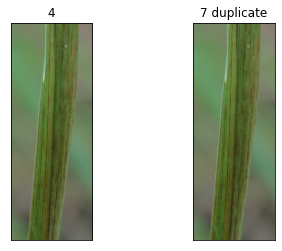

deleted 1437 images


In [8]:
duplicates = []
hash_keys = dict()

for direc in list_files:
    print(direc)
    os.chdir('/home/jpawick/Medienverarbeitung/dataset/' + direc)
    
    duplicates = []
    hash_keys = dict()
    for index, filename in enumerate(os.listdir()):
        if os.path.isfile(filename):
            with open(filename, 'rb') as f: 
                filehash = hashlib.md5(f.read()).hexdigest()
            if filehash not in hash_keys:
                hash_keys[filehash] = index
            else:
                duplicates.append((index, hash_keys[filehash]))
    print(len(duplicates))
    
    list_files = os.listdir()
    for file_indexes in duplicates[:1]:
        try:
            plt.subplot(121),plt.imshow(imread(list_files[file_indexes[1]]))
            plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

            plt.subplot(122),plt.imshow(imread(list_files[file_indexes[0]]))
            plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
            plt.show()

        except OSError as e:
            continue
            
    for index in duplicates:
        os.remove(list_files[index[0]])
    print('deleted ' + str(len(duplicates)) + ' images')

In [9]:
os.chdir('/home/jpawick/Medienverarbeitung/dataset/')

for direc in os.listdir():
    print(direc)
    print(len(os.listdir(direc)))

strawberry leaf
237
tomato leaf yellow virus
201
peach leaf curl
224
grape leaf black rot
218
corn rust leaf
238
tomato leaf blight
190
tomato leaf spot
230
corn gray leaf spot
183
apple scab leaf
207
tomato leaf mosaic virus
247
grape leaf
223
soybean leaf blightsquash leaf
288
raspberry leaf
217
peach leaf
196
raspberry leaf spot
210
.ipynb_checkpoints
0
soybean leaf blight
63
strawberry rust leaf
209
tomato leaf
265
squash leaf
57
bell pepper leaf
231
apple rust leaf
181
soybean leaf
171
potato leaf
239
squash powdery mildew leaf
198
peach leaf bacterial spot
244
potato leaf blight
208
corn leaf blight
200
soybean leaf rust
162
bell pepper leaf spot
187
tomato mold leaf
199
apple leaf
198
